In [76]:
import io
import numpy as np
import PIL
import matplotlib.pyplot as plt
import requests
import torch
import openpifpaf
import cv2
import os

print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

OpenPifPaf version 0.13.11
PyTorch version 1.13.1+cpu


In [101]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = PIL.Image.open(os.path.join(folder,filename)).convert('RGB')
        if img is not None:
            images.append(img)
    return images

In [ ]:
all_images = load_images_from_folder("C:\Austin\Masters_UCinci\Thesis\images_base_testing")

In [104]:
len(all_images)

100

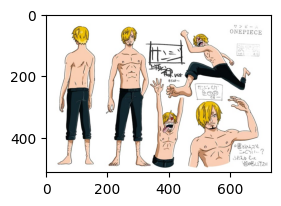

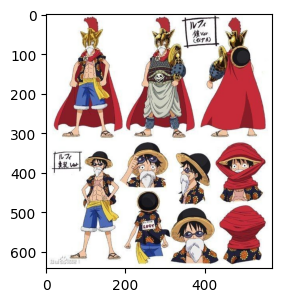

In [105]:
n=0
for i in range(len(all_images)):
    n=n+1
    plt.subplot(1,2,i+1)
    plt.imshow(all_images[i])
    plt.show()
    if n == 2:
        break
plt.show()

In [ ]:
path = "C:/Users/austi/Downloads/4e610a161f8e56bd24d75ca063c318e3.jpg"
pil_im = PIL.Image.open(path).convert('RGB')
im = np.asarray(pil_im)


In [106]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')

all_pose_preds = []

for img in all_images:
    predictions, gt_anns, image_meta = predictor.pil_image(img)
    all_pose_preds.append(predictions)

In [108]:
len(all_pose_preds)

100

In [122]:
print(len(all_pose_preds[0][0].data))
print(len(all_pose_preds[0][1].data))
print(len(all_pose_preds[0][2].data))

17
17
17


In [128]:
all_pose_pred_coords = []
for img in all_pose_preds:
    img_aux = []
    for pose in img:
        pos_main = pose.data
        x=[]
        y=[]
        for point in pos_main:
            x.append(point[0])
            y.append(point[1])
        img_aux.append([x,y])
    all_pose_pred_coords.append(np.array(img_aux))

In [ ]:
all_pose_pred_coords[0]

array([[[270.08618 , 278.50836 , 262.8188  , 288.59824 , 253.08005 ,
         307.13644 , 232.60457 , 325.76028 , 213.75363 , 312.1981  ,
         209.34521 , 294.83044 , 252.98627 , 299.88803 , 245.44312 ,
         303.13712 , 235.43864 ],
        [ 82.43673 ,  74.16322 ,  74.15579 ,  78.88543 ,  80.3573  ,
         142.68951 , 141.79749 , 211.1369  , 211.44965 , 260.034   ,
         271.33157 , 253.49405 , 254.95276 , 353.14987 , 335.68942 ,
         457.25732 , 446.64505 ]],

       [[  0.      ,   0.      ,   0.      ,  98.9936  , 133.69193 ,
          79.33735 , 147.05151 ,  65.70002 , 149.805   ,  50.276363,
         143.94873 ,  87.3413  , 123.76798 ,   0.      ,   0.      ,
           0.      ,   0.      ],
        [ -7.      ,  -7.      ,  -7.      ,  85.48881 ,  81.87242 ,
         137.7414  , 138.9292  , 211.53346 , 215.27896 , 267.28995 ,
         266.71347 , 259.48975 , 256.17563 ,  -7.      ,  -7.      ,
          -7.      ,  -7.      ]],

       [[  0.      ,   0.      ,

In [ ]:
[all_pose_pred_coords[0]]

array([[[270.08618 ,   0.      ,   0.      ],
        [ 82.43673 ,  -7.      ,  -7.      ]],

       [[278.50836 ,   0.      ,   0.      ],
        [ 74.16322 ,  -7.      ,  -7.      ]],

       [[262.8188  ,   0.      ,   0.      ],
        [ 74.15579 ,  -7.      ,  -7.      ]],

       [[288.59824 ,  98.9936  ,   0.      ],
        [ 78.88543 ,  85.48881 ,  -7.      ]],

       [[253.08005 , 133.69193 ,   0.      ],
        [ 80.3573  ,  81.87242 ,  -7.      ]],

       [[307.13644 ,  79.33735 , 523.6086  ],
        [142.68951 , 137.7414  , 108.89563 ]],

       [[232.60457 , 147.05151 , 544.9975  ],
        [141.79749 , 138.9292  , 114.71593 ]],

       [[325.76028 ,  65.70002 , 474.94626 ],
        [211.1369  , 211.53346 , 114.691864]],

       [[213.75363 , 149.805   , 576.66455 ],
        [211.44965 , 215.27896 , 131.89679 ]],

       [[312.1981  ,  50.276363, 453.65628 ],
        [260.034   , 267.28995 ,  73.16953 ]],

       [[209.34521 , 143.94873 , 599.54016 ],
        [271.3

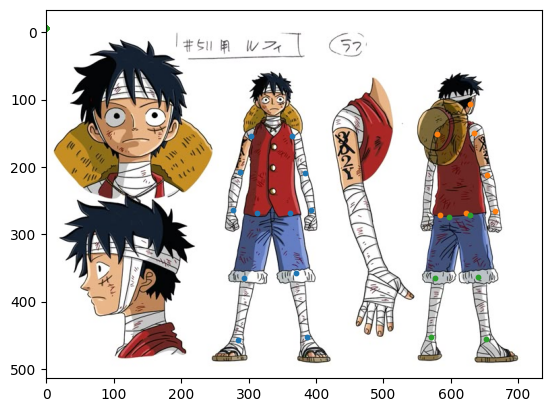

In [165]:
i = 30
plt.imshow(all_images[i])
for j in range(len(all_pose_pred_coords[i])):
    plt.scatter(all_pose_pred_coords[i][j][0], all_pose_pred_coords[i][j][1], s=10)
plt.show()


In [65]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [66]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [67]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [68]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

(-0.5, 735.5, 513.5, -0.5)

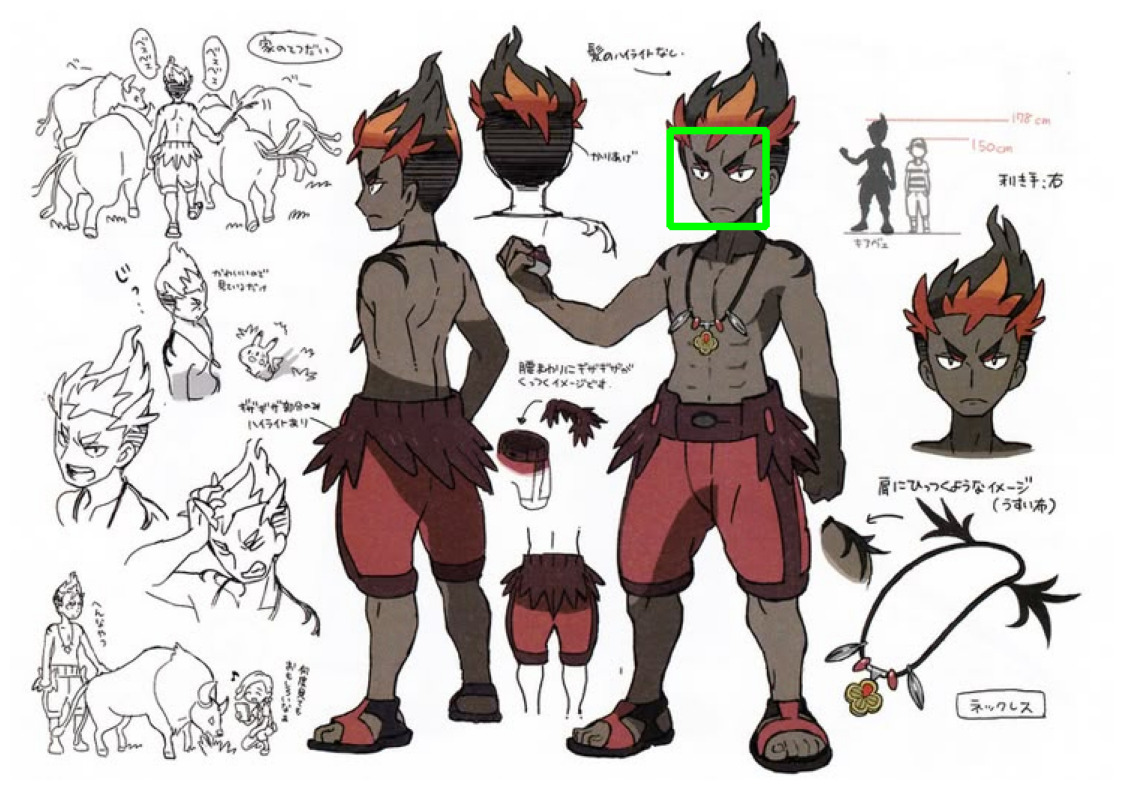

In [69]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')